In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
sentiment = pd.read_csv('consumer_sentiment.csv')

In [3]:
sentiment

,CASEID,YYYYMM,YYYYQ,YYYY,ID,IDPREV,DATEPR,ICS,ICC,ICE
0,1,197801,19781,1978,1,,,76.71,116.23,51.32
1,2,197801,19781,1978,2,,,121.12,154.08,99.94
2,3,197801,19781,1978,3,,,2.70,2.70,2.70
3,4,197801,19781,1978,4,,,76.71,154.08,27.01
4,5,197801,19781,1978,5,,,121.12,116.23,124.25
...,...,...,...,...,...,...,...,...,...,...
312726,312727,202307,20233,2023,2097,1130,202301,31.60,39.84,26.31
312727,312728,202307,20233,2023,2098,1038,202301,76.01,153.38,26.31
312728,312729,202307,20233,2023,2099,1141,202301,61.21,115.53,26.31
312729,312730,202307,20233,2023,2100,1071,202301,90.81,77.69,99.24


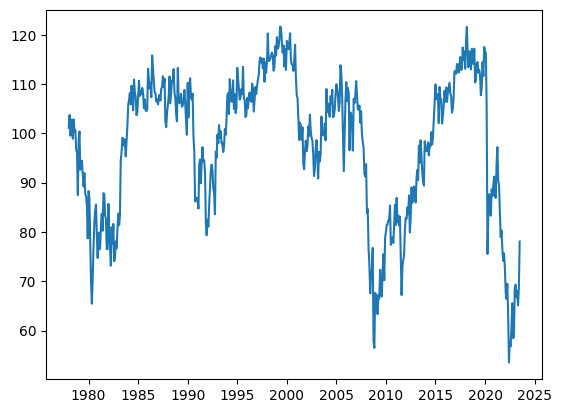

In [12]:
sentiment['DATE'] = pd.to_datetime(sentiment.YYYYMM, format="%Y%m")

sentiment_by_month = sentiment.groupby(['DATE']).ICC.mean()

plt.plot(sentiment_by_month)
plt.show()

In [5]:
unemployment = pd.read_csv("unemployment_rate.csv")
unemployment['DATE'] = pd.to_datetime(unemployment.DATE)
unemployment = unemployment.set_index('DATE')
inflation = pd.read_csv("inflation.csv")
inflation['DATE'] = pd.to_datetime(inflation.DATE)
inflation = inflation.set_index('DATE')

In [6]:
data = pd.DataFrame(data={"sentiment": sentiment_by_month, 
                          "inflation": inflation.CORESTICKM159SFRBATL, 
                          "unemployment": unemployment.UNRATE}).dropna()

In [65]:
data['sentiment'] = (data.sentiment - data.sentiment.mean())/data.sentiment.std()
data['unemployment'] = (data.unemployment - data.unemployment.mean())/data.unemployment.std()
data['inflation'] = (data.inflation - data.inflation.mean())/data.inflation.std()

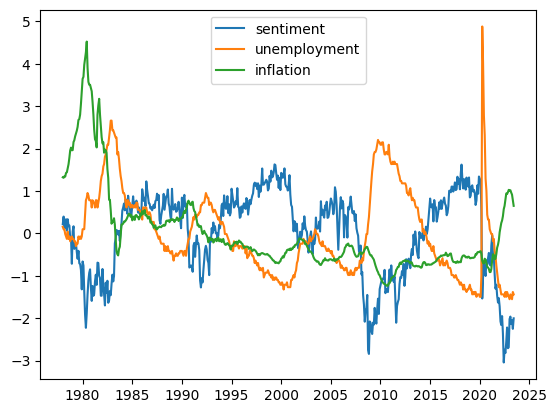

In [66]:
plt.plot(data.sentiment)
plt.plot(data.unemployment)
plt.plot(data.inflation)
plt.legend(['sentiment', 'unemployment', 'inflation'])
plt.show()

In [67]:
data_80s = data[data.index < '1990']
data_precovid = data[data.index < '2020-02-01']

In [72]:
model_80s = LinearRegression().fit(data_80s[['inflation', 'unemployment']], data_80s.sentiment)
model_precovid = LinearRegression().fit(data_precovid[['inflation', 'unemployment']], data_precovid.sentiment)
model_full = LinearRegression().fit(data[['inflation', 'unemployment']], data.sentiment)

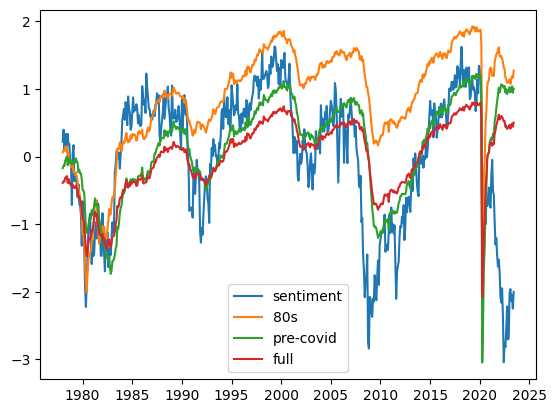

In [69]:
plt.plot(data.sentiment)
plt.plot(data.index, model_80s.predict(data[['inflation', 'unemployment']]))
plt.plot(data.index, model_precovid.predict(data[['inflation', 'unemployment']]))
plt.plot(data.index, model_full.predict(data[['inflation', 'unemployment']]))
plt.legend(['sentiment', '80s', 'pre-covid', 'full'])
plt.show()

In [73]:
model_80s_r = Ridge(10).fit(data_80s[['inflation', 'unemployment']], data_80s.sentiment)
model_precovid_r = Ridge(10).fit(data_precovid[['inflation', 'unemployment']], data_precovid.sentiment)
model_full_r = Ridge(10).fit(data[['inflation', 'unemployment']], data.sentiment)

In [84]:
model_80s_r.coef_, model_80s.coef_

(array([-0.50974949, -0.4818544 ]), array([-0.53387983, -0.53276734]))

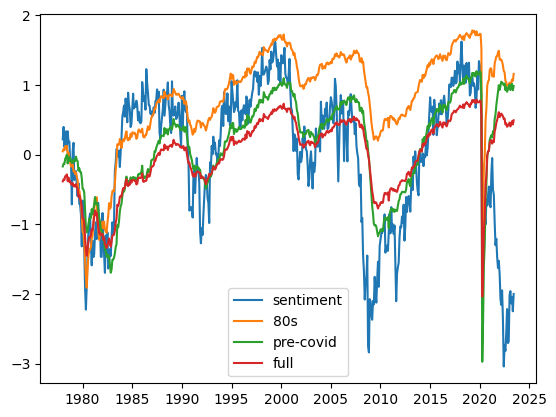

In [85]:
plt.plot(data.sentiment)
plt.plot(data.index, model_80s_r.predict(data[['inflation', 'unemployment']]))
plt.plot(data.index, model_precovid_r.predict(data[['inflation', 'unemployment']]))
plt.plot(data.index, model_full_r.predict(data[['inflation', 'unemployment']]))
plt.legend(['sentiment', '80s', 'pre-covid', 'full'])
plt.show()